<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.4/506.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.65
    Uninstalling yfinance-0.2.65:
      Successfully uninstalled yfinance-0.2.65
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=1536238401e4ed8095f0f5af0e1b959f787389a101f97f1e9bf7b0f75149c7a6
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-09-15 15:47:36
-------------------
qualified stocks: 88
with latest results: 27
still star stocks: 16
-------------------
Initial Investment:  1.22 C
CY Investment:  1.49 C
Reserve:  2.18 L
Current:  1.42 C
-------------------
Today PnL: 11.47 K (0.08%)
Current PnL: -17.54 L (-11.8%)
CY Booked + Current PnL: -6.51 L (-4.38%)
-------------------
Total profit:  2.13 L
Total loss:  -19.67 L
-------------------
Total Booked + Current PnL: 20.47 L (16.82%)
Total Booked PnL: 38.01 L (31.23%)
Curr Year Booked PnL: 11.03 L (7.79%)
Prev Year Booked PnL: 26.98 L (22.17%)
Est FTT:  2.25 C
Est FTT PnL: 83.44 L (58.9%)
Deployed:  1.22 C
Current:  1.42 C
CAGR/XIRR %: 9.44%
Row successfully appended and saved to data/myPortfolioDB.csv.


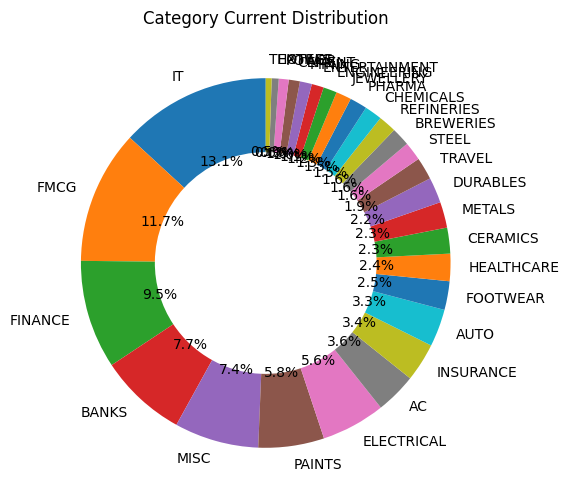

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
63,SBIN,760.30,863.00,-11.26,4.25,M-LC,62.0,218559.0,17080.0,10141.0,...,8.48,4.64,13.51,60.0,1.68,1.57,22.14,XY25,BANKS,NTT
5,APOLLOHOSP,7098.95,8285.00,-20.98,11.12,H-LC,56.0,171963.0,15786.0,10301.0,...,10.11,5.99,16.71,22.0,1.53,1.23,29.31,X40N,HEALTHCARE,BTT
78,TTKPRESTIG,769.29,770.00,104.27,4.71,M-SC,59.0,88052.0,-12725.0,12820.0,...,-12.63,14.56,0.09,245.0,-0.99,0.63,15.68,OX40N,DURABLES,NTT
50,NATIONALUM,189.63,247.44,-41.67,5.04,H-MC,71.0,114899.0,14395.0,16247.0,...,14.32,14.14,30.49,79.0,0.89,0.82,51.37,MH,METALS,ATH
42,ITC,409.28,452.00,-37.58,2.91,H-LC,53.0,201786.0,1648.0,19250.0,...,0.82,9.54,10.44,4.0,0.09,1.45,6.43,X40,FMCG,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AWL,315.97,485.00,-65.13,4.47,H-SC,50.0,246629.0,-55122.0,216540.0,...,-18.27,87.80,53.50,116.0,-0.25,1.77,9.54,XY24,FMCG,NTT
66,SIEMENS,3721.90,7969.85,2.44,28.54,H-LC,63.0,164685.0,-21410.0,233803.0,...,-11.50,141.97,114.13,15.0,-0.09,1.18,21.28,AR,ELECTRICAL,ATH
58,REPCOHOME,488.08,880.00,-59.76,7.24,H-SC,54.0,180763.0,-54980.0,244283.0,...,-23.32,135.14,80.30,134.0,-0.23,1.30,22.37,XY24,FINANCE,NTT
11,BANDHANBNK,207.88,400.00,-12.83,5.51,H-SC,42.0,217268.0,-61291.0,318732.0,...,-22.00,146.70,92.42,151.0,-0.19,1.56,25.56,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-38.67,11.52,H-LC,62.0,256262.0,-5357.0,124569.0,...,-2.05,48.61,45.57,7.0,-0.04,1.84,9.04,AR,ELECTRICAL,NTT
2,ACC,2579.05,3906.00,-37.20,5.40,M-MC,58.0,135838.0,-52433.0,149300.0,...,-27.85,109.91,51.45,174.0,-0.35,0.97,4.38,XY24,CEMENT,BTT
4,ANGELONE,2329.34,3033.00,4.54,8.50,H-SC,36.0,184664.0,-6342.0,64041.0,...,-3.32,34.68,30.21,157.0,-0.10,1.32,16.87,X40N,FINANCE,NTT
5,APOLLOHOSP,7098.95,8285.00,-20.98,11.12,H-LC,56.0,171963.0,15786.0,10301.0,...,10.11,5.99,16.71,22.0,1.53,1.23,29.31,X40N,HEALTHCARE,BTT
6,ASIANPAINT,2861.00,3465.66,-12.71,8.41,H-LC,48.0,220229.0,-31539.0,84744.0,...,-12.53,38.48,21.13,27.0,-0.37,1.58,18.46,X40,PAINTS,ATH
9,AWL,315.97,485.00,-65.13,4.47,H-SC,50.0,246629.0,-55122.0,216540.0,...,-18.27,87.80,53.50,116.0,-0.25,1.77,9.54,XY24,FMCG,NTT
10,BAJAJHFL,122.26,152.00,-11.69,6.14,H-MC,51.0,185894.0,-14612.0,63390.0,...,-7.29,34.10,24.33,90.0,-0.23,1.33,7.20,X40N,FINANCE,BTT
12,BANKINDIA,116.91,190.00,-29.10,5.76,H-MC,63.0,181469.0,1661.0,110751.0,...,0.92,61.03,62.52,88.0,0.01,1.30,35.33,XR,BANKS,NTT
13,BATAINDIA,1550.24,2096.00,11.32,6.91,M-SC,68.0,104870.0,-23800.0,69099.0,...,-18.50,65.89,35.20,219.0,-0.34,0.75,20.37,X40,FOOTWEAR,NTT
14,BERGEPAINT,561.33,680.00,-17.80,6.18,H-MC,51.0,220421.0,-6918.0,54973.0,...,-3.04,24.94,21.14,106.0,-0.13,1.58,24.24,XY24,PAINTS,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,123.56,8.24,H-SC,45.0,152027.0,-66469.0,94667.0,...,-30.42,62.27,12.90,153.0,-0.70,1.09,15.72,OX40N,FINANCE,NTT
19,CERA,7647.97,9475.0,-20.29,2.16,H-SC,44.0,145337.0,-30566.0,72581.0,...,-17.38,49.94,23.89,149.0,-0.42,1.04,25.52,OX40N,CERAMICS,NTT
38,INDIGOPNTS,1407.73,1408.0,114.29,2.38,M-SC,48.0,140418.0,-34141.0,34178.0,...,-19.56,24.34,0.02,221.0,-1.00,1.01,22.14,OX40N,PAINTS,NTT
43,JCHAC,2282.24,2282.0,19813.04,1.52,M-SC,50.0,97278.0,-30527.0,30516.0,...,-23.89,31.37,-0.01,232.0,-1.00,0.70,10.15,OX40N,AC,NTT
45,KANSAINER,299.63,340.0,-67.72,1.84,H-SC,56.0,221535.0,-48132.0,84471.0,...,-17.85,38.13,13.47,138.0,-0.57,1.59,12.05,XY24,PAINTS,NTT
54,RAJESHEXPO,517.65,518.0,1852.02,4.98,L-SC,64.0,53268.0,-83909.0,84004.0,...,-61.17,157.70,0.07,267.0,-1.00,0.38,32.48,OX40N,JEWELLERY,NTT
64,SFL,1016.35,1287.0,42.34,8.59,M-SC,56.0,187992.0,-74226.0,144058.0,...,-28.31,76.63,26.63,229.0,-0.52,1.35,16.88,XY24,MISC,NTT
67,SIS,435.42,528.0,2110.88,5.34,H-SC,37.0,89224.0,-21808.0,45415.0,...,-19.64,50.90,21.26,156.0,-0.48,0.64,20.55,OX40N,MISC,NTT
71,SYMPHONY,1306.42,1306.0,-42.47,18.58,M-SC,34.0,122806.0,-48335.0,48275.0,...,-28.24,39.31,-0.03,196.0,-1.00,0.88,0.67,OX40N,DURABLES,NTT
73,TATAELXSI,6938.68,9161.0,-20.18,7.86,H-MC,52.0,108015.0,-23820.0,66040.0,...,-18.07,61.14,32.03,98.0,-0.36,0.77,20.99,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ACC,2579.05,3906.00,-37.20,5.40,M-MC,58.0,135838.0,-52433.0,149300.0,...,-27.85,109.91,51.45,174.0,-0.35,0.97,4.38,XY24,CEMENT,BTT
8,ATULAUTO,624.44,844.00,3818.92,6.75,M-SC,63.0,122213.0,-25155.0,76970.0,...,-17.07,62.98,35.16,236.0,-0.33,0.88,24.83,XY24,AUTO,NTT
9,AWL,315.97,485.00,-65.13,4.47,H-SC,50.0,246629.0,-55122.0,216540.0,...,-18.27,87.80,53.50,116.0,-0.25,1.77,9.54,XY24,FMCG,NTT
11,BANDHANBNK,207.88,400.00,-12.83,5.51,H-SC,42.0,217268.0,-61291.0,318732.0,...,-22.00,146.70,92.42,151.0,-0.19,1.56,25.56,XY24,BANKS,NTT
14,BERGEPAINT,561.33,680.00,-17.80,6.18,H-MC,51.0,220421.0,-6918.0,54973.0,...,-3.04,24.94,21.14,106.0,-0.13,1.58,24.24,XY24,PAINTS,NTT
17,CAMPUS,294.86,393.00,-25.94,1.62,M-SC,54.0,154370.0,-13405.0,69250.0,...,-7.99,44.86,33.28,210.0,-0.19,1.11,19.65,XY24,FOOTWEAR,NTT
21,COALINDIA,406.65,497.97,8.79,1.69,L-LC,67.0,146058.0,-4402.0,38194.0,...,-2.93,26.15,22.46,167.0,-0.12,1.05,14.62,XY25,MINING,ATH
23,COLPAL,2714.63,3767.14,1.49,7.32,H-MC,53.0,184517.0,-27224.0,109326.0,...,-12.86,59.25,38.77,84.0,-0.25,1.32,9.82,XY25,FMCG,ATH
24,DABUR,505.20,735.00,-3.05,6.39,H-MC,57.0,210951.0,13923.0,75689.0,...,7.07,35.88,45.49,102.0,0.18,1.51,21.03,XY24,FMCG,BTT
26,EASEMYTRIP,18.12,26.40,-12.72,27.81,M-SC,42.0,84114.0,-92701.0,173494.0,...,-52.43,206.26,45.70,197.0,-0.53,0.60,3.61,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-38.67,11.52,H-LC,62.0,256262.0,-5357.0,124569.0,...,-2.05,48.61,45.57,7.0,-0.04,1.84,9.04,AR,ELECTRICAL,NTT
3,ALKYLAMINE,2347.98,4546.37,-5.91,13.68,H-SC,46.0,88640.0,-12323.0,106856.0,...,-12.21,120.55,93.63,148.0,-0.12,0.64,32.03,SR,CHEMICALS,ATH
7,ASIANTILES,75.41,137.00,6561.11,5.72,L-SC,43.0,73110.0,-20700.0,97317.0,...,-22.07,133.11,81.67,269.0,-0.21,0.52,41.58,XR,CERAMICS,NTT
12,BANKINDIA,116.91,190.00,-29.10,5.76,H-MC,63.0,181469.0,1661.0,110751.0,...,0.92,61.03,62.52,88.0,0.01,1.30,35.33,XR,BANKS,NTT
16,BSOFT,551.58,836.99,-14.41,15.71,H-SC,47.0,96020.0,-44633.0,117413.0,...,-31.73,122.28,51.74,131.0,-0.38,0.69,9.50,XR,IT,ATH
22,COFFEEDAY,59.14,80.00,-41.65,45.54,L-SC,53.0,85286.0,-28263.0,68314.0,...,-24.89,80.10,35.27,268.0,-0.41,0.61,108.74,XR,HOTELS,NTT
25,DEN,52.79,75.00,104.66,2.94,M-SC,50.0,57840.0,-26624.0,62161.0,...,-31.52,107.47,42.07,237.0,-0.43,0.41,22.83,AR,ENTERTAINMENT,NTT
28,HAPPSTMNDS,801.03,1488.71,-15.38,10.14,H-SC,42.0,91216.0,-36949.0,146976.0,...,-28.83,161.13,85.85,132.0,-0.25,0.65,5.54,AR,IT,ATH
29,HATHWAY,18.12,31.40,939.86,1.98,H-SC,53.0,89400.0,-19320.0,99002.0,...,-17.77,110.74,73.29,161.0,-0.20,0.64,19.58,XR,ENTERTAINMENT,NTT
36,IEX,147.35,219.00,-30.16,17.97,H-SC,53.0,199764.0,-190.0,97425.0,...,-0.09,48.77,48.63,115.0,-0.00,1.43,11.45,XR,MISC,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.50
1,20,35.38
2,30,49.73


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,44.98
LC,32.41
MC,22.57


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,28.57
X40,15.02
X40N,12.74
XR,11.32
XY25,9.64
AR,8.52
OX40N,8.04
X200,1.72
MH,1.69


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,30.14
H-LC,24.27
H-MC,19.66
M-SC,13.33
M-LC,7.09
M-MC,2.61
L-SC,1.51
L-LC,1.05
L-MC,0.30


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

,,CurrAlloc%
Criteria,Conviction,
XY24,H-SC,10.02
X40,H-LC,9.08
XY24,M-SC,6.60
XR,H-SC,6.24
X40,H-MC,5.19
X40N,H-LC,4.91
AR,H-SC,4.55
XY24,H-MC,4.44
X40N,H-MC,4.30


In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
IT,13.13,-14.67,77.19
FMCG,11.66,-4.02,40.42
FINANCE,9.49,-16.10,61.57
BANKS,7.66,-12.29,63.98
MISC,7.38,-11.66,73.76
PAINTS,5.76,-15.04,32.19
ELECTRICAL,5.59,-5.53,63.69
AC,3.57,2.88,30.02
INSURANCE,3.36,-7.21,43.98


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,56.94,7939858.0,-9.79,-777480.0,54.84,4354104.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,57.69,8049911.0,-3.68,-296593.0,42.32,3406639.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2862010.0
XR,1330085.0
AR,1307650.0
X40,752835.0
X40N,632532.0
OX40N,524346.0
XY25,406535.0
SR,245701.0
X5K,117477.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3670925.0
M-SC,1386171.0
H-LC,1206524.0
H-MC,1026142.0
M-LC,392271.0
M-MC,313252.0
L-SC,249635.0
L-MC,60427.0
L-LC,38194.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1257108.0
          M-SC           798494.0
AR        H-SC           787015.0
XR        H-SC           772263.0
X40       H-LC           470515.0
AR        H-LC           358372.0
XY24      M-MC           313252.0
X40N      H-SC           297196.0
XY24      H-MC           271486.0
OX40N     H-SC           248513.0
SR        H-SC           245701.0
X40       H-MC           213221.0
XY25      H-MC           184739.0
X40N      H-LC           171678.0
XR        L-SC           165631.0
X40N      H-MC           163658.0
AR        M-SC           162263.0
XY24      M-LC           160053.0
OX40N     M-SC           125789.0
X5K       M-LC           117477.0
XR        M-SC           116413.0
XY25      M-SC           114113.0
XR        H-MC           110751.0
          M-LC           104600.0
X200      H-LC            84994.0
OX40N     L-SC            84004.0
X40       M-SC            69099.0
OX40N     H-MC            66040.0
MH        H-SC            63129.0
XY24      H-LC            61617.0
XR        L-MC            60427.0
XY25      H-LC            59348.0
          L-LC            38194.0
MH        H-MC            16247.0
XY25      M-LC            10141.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,30
M-SC,17
H-MC,15
H-LC,14
M-LC,5
L-SC,3
M-MC,2
L-LC,1
L-MC,1
